In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.metrics import mean_squared_error


In [15]:
rating = pd.read_csv('/content/drive/MyDrive/ratings.csv')
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [16]:
rating = rating.drop(['timestamp'], axis = 1)

In [17]:
rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [18]:
rating['userId'].nunique()

610

In [19]:
rating['movieId'].nunique()

9724

In [20]:
rating.groupby(['userId', 'movieId']).count()

rating
userId movieId        
1      1             1
       3             1
       6             1
       47            1
       50            1
...                ...
610    166534        1
       168248        1
       168250        1
       168252        1
       170875        1

[100836 rows x 1 columns]

In [21]:
rating.groupby(['userId', 'movieId']).count()['rating'].sum()

100836

In [22]:
rating['movieId'].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: movieId, Length: 9724, dtype: int64

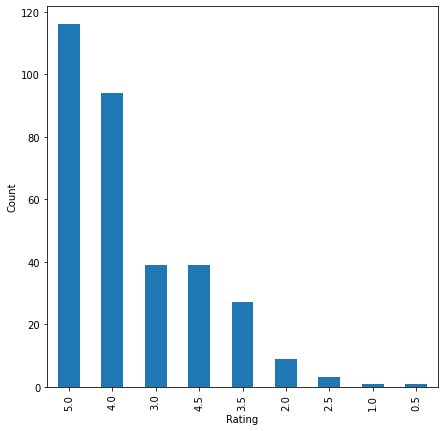

In [27]:
plt.figure(figsize = (7,7))
rating[rating['movieId'] == 356]['rating'].value_counts().plot(kind = 'bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [6]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.metrics import mean_squared_error

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
rating = pd.read_csv('/content/drive/MyDrive/ratings.csv')

In [10]:
rating['userId'].value_counts

<bound method IndexOpsMixin.value_counts of 0           1
1           1
2           1
3           1
4           1
         ... 
100831    610
100832    610
100833    610
100834    610
100835    610
Name: userId, Length: 100836, dtype: int64>

In [11]:
rating['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: userId, Length: 610, dtype: int64

In [13]:
count_interactions = rating.groupby('userId').count()['movieId']
count_interactions

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: movieId, Length: 610, dtype: int64

In [14]:
average_rating = rating.groupby('movieId').mean()['rating']
count_rating = rating.groupby('movieId').count()['rating']
final_rating = pd.DataFrame({'avg_rating': average_rating, 'rating_count': count_rating})

In [15]:
final_rating.head()

,avg_rating,rating_count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49


In [16]:
def top_n_movies(data, n, min_interaction = 100):
  recommendations = data[data['rating_count'] > min_interaction]
  recommendations = recommendations.sort_values(by = 'avg_rating', ascending = False)
  return recommendations.index[:n]

In [17]:
list(top_n_movies(final_rating, 5, 50))

[318, 858, 2959, 1276, 750]

In [18]:
list(top_n_movies(final_rating, 5, 100))

[318, 858, 2959, 1221, 48516]

In [19]:
list(top_n_movies(final_rating, 5, 200))

[318, 2959, 50, 260, 527]